# Data set challenge - Time Series

In [1]:
import pandas as pd
import numpy as np

def detect_outliers(df, columns, threshold=1.5):
    outlier_mask = pd.DataFrame(False, index=df.index, columns=columns)
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        outlier_mask[col] = ((df[col] < (Q1 - threshold * IQR)) | (df[col] > (Q3 + threshold * IQR)))
    
    return outlier_mask

### Désaisonaliser

In [2]:
df = pd.read_csv("/Users/raphaelbarthes/Downloads/DE_2023_daily.csv")
df['production'] = df['Carbon Intensity gCO₂eq/kWh (direct)']
df.head()

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,production
0,2023-01-01 00:00:00,Germany,Germany,DE,176.56,227.06,81.86,75.03,entsoe.eu,176.56
1,2023-01-02 00:00:00,Germany,Germany,DE,308.94,364.16,69.63,63.69,entsoe.eu,308.94
2,2023-01-03 00:00:00,Germany,Germany,DE,434.45,499.26,57.58,50.93,entsoe.eu,434.45
3,2023-01-04 00:00:00,Germany,Germany,DE,192.94,236.29,80.57,76.62,entsoe.eu,192.94
4,2023-01-05 00:00:00,Germany,Germany,DE,343.69,400.74,65.92,59.97,entsoe.eu,343.69


In [3]:
len(df)

365

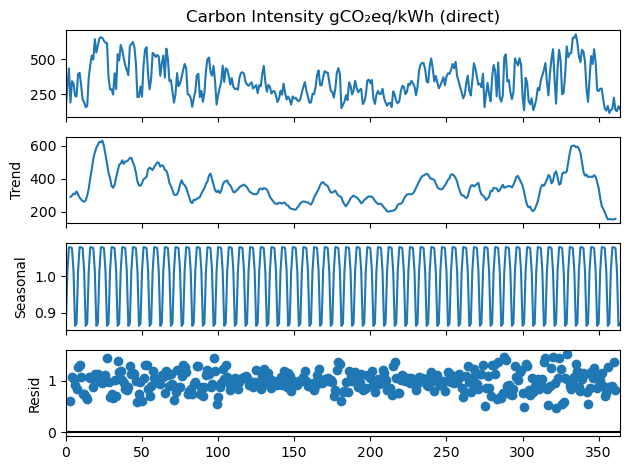

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Carbon Intensity gCO₂eq/kWh (direct)'], model='multiplicative', period=7)
data_deseasonnalized = result.resid

# Visualisation
result.plot()
plt.show()

In [11]:
result.seasonal[7]

0.8698380375327341

In [16]:
data.head(10)

0    176.56
1    308.94
2    434.45
3    192.94
4    343.69
5    326.82
6    240.83
7    235.37
8    394.50
9    402.92
Name: production, dtype: float64

In [17]:
data.values.reshape(-1, period)

array([[176.56, 308.94, 434.45, 192.94, 343.69],
       [326.82, 240.83, 235.37, 394.5 , 402.92],
       [316.13, 212.59, 195.12, 160.24, 168.09],
       [367.89, 457.83, 525.33, 496.84, 640.99],
       [546.74, 595.24, 645.82, 655.07, 648.72],
       [629.75, 614.82, 613.78, 370.25, 284.6 ],
       [286.79, 249.04, 399.73, 288.3 , 534.44],
       [490.39, 599.6 , 565.2 , 506.58, 452.97],
       [423.92, 386.79, 590.65, 605.41, 620.82],
       [584.52, 468.89, 231.12, 233.07, 305.72],
       [234.52, 455.64, 568.04, 583.74, 387.78],
       [286.35, 363.79, 544.01, 533.7 , 515.15],
       [529.3 , 517.24, 381.65, 467.78, 526.24],
       [369.91, 573.67, 503.18, 344.1 , 350.62],
       [273.71, 191.99, 252.97, 401.04, 308.16],
       [328.56, 369.88, 421.86, 465.72, 437.85],
       [251.47, 246.66, 224.47, 161.88, 222.57],
       [270.32, 385.1 , 396.19, 231.63, 274.41],
       [198.38, 263.54, 417.88, 500.16, 510.79],
       [408.86, 382.17, 451.51, 341.56, 177.83],
       [245.72, 295.

In [14]:
data = df['production']
period = 5
seasonal_component = data.values.reshape(-1, period)
seasonal_component = np.mean(seasonal_component, axis=0)
seasonal_component

array([342.34945205, 336.85246575, 340.47027397, 340.71082192,
       355.08164384])

In [6]:
def deseasonalize_data(data, period, model='multiplicative'):

    # Calculate the seasonal component
    seasonal_component = data.values.reshape(-1, period)
    if model == 'additive':
        seasonal_component = np.mean(seasonal_component, axis=0)
    else:  # multiplicative model
        seasonal_component = np.median(seasonal_component, axis=0)

    # Deseasonalize the data
    deseasonalized = data.copy()
    for i in range(period):
        deseasonalized.iloc[i::period] -= seasonal_component[i]
        
    return deseasonalized

In [7]:
df_2 = df[['Carbon Intensity gCO₂eq/kWh (direct)', 'Carbon Intensity gCO₂eq/kWh (LCA)']]

In [8]:
df_2.values

array([[176.56, 227.06],
       [308.94, 364.16],
       [434.45, 499.26],
       [192.94, 236.29],
       [343.69, 400.74],
       [326.82, 386.48],
       [240.83, 296.37],
       [235.37, 288.96],
       [394.5 , 455.83],
       [402.92, 463.34],
       [316.13, 369.48],
       [212.59, 257.62],
       [195.12, 240.41],
       [160.24, 204.65],
       [168.09, 213.06],
       [367.89, 426.32],
       [457.83, 524.36],
       [525.33, 599.39],
       [496.84, 567.21],
       [640.99, 725.33],
       [546.74, 620.93],
       [595.24, 674.  ],
       [645.82, 730.78],
       [655.07, 741.4 ],
       [648.72, 735.08],
       [629.75, 715.37],
       [614.82, 698.1 ],
       [613.78, 699.42],
       [370.25, 436.71],
       [284.6 , 340.13],
       [286.79, 343.25],
       [249.04, 301.24],
       [399.73, 464.11],
       [288.3 , 341.95],
       [534.44, 612.63],
       [490.39, 564.55],
       [599.6 , 683.6 ],
       [565.2 , 646.82],
       [506.58, 581.47],
       [452.97, 522.24],


In [9]:
seasonal_component = df_2.values.reshape(-1, 10)

In [11]:
seasonal_component = np.mean(seasonal_component, axis=0)

In [12]:
# Deseasonalize the data
deseasonalized = df_2.copy()
for i in range(10):
    deseasonalized.iloc[i::10] /= seasonal_component[i]

### Cleaning

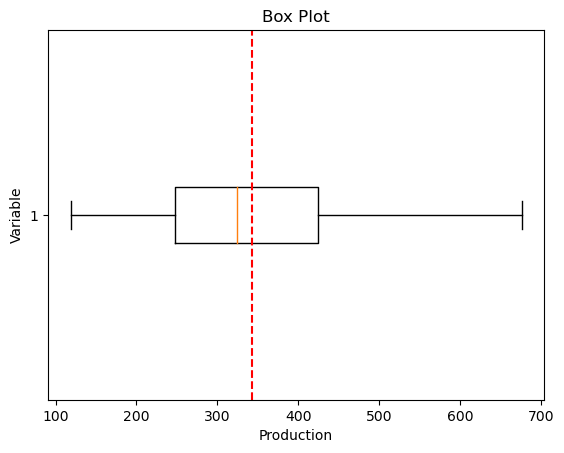

In [13]:
import matplotlib.pyplot as plt 
  
plt.boxplot(df['production'], vert=False) 
mean = np.mean(df['production'])
plt.axvline(mean, color='r', linestyle='--', label='Mean')

plt.ylabel('Variable') 
plt.xlabel('Production') 
plt.title('Box Plot') 
plt.show()

In [22]:
np.median(df['production'])

323.72

In [23]:
np.mean(df['production'])

343.0929315068493

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['production' ,'Renewable Percentage']].values.reshape(-1,2))
scaled_data 

array([[-1.33927022e+00,  1.16107125e+00],
       [-2.74660416e-01,  3.22020329e-01],
       [ 7.34700341e-01, -6.22096936e-01],
       [-1.20754105e+00,  1.27871596e+00],
       [ 4.80166924e-03,  4.67761109e-02],
       [-1.30868126e-01,  8.82107244e-02],
       [-8.22406103e-01,  4.97377533e-01],
       [-8.66315829e-01,  6.34259738e-01],
       [ 4.13419469e-01, -3.38713775e-01],
       [ 4.81133736e-01, -3.00978681e-01],
       [-2.16837901e-01,  3.61235231e-01],
       [-1.04951428e+00,  1.15071260e+00],
       [-1.19000932e+00,  1.19140731e+00],
       [-1.47051688e+00,  1.38822172e+00],
       [-1.40738659e+00,  1.40301980e+00],
       [ 1.99419870e-01, -3.60931161e-02],
       [ 9.22724040e-01, -7.52320006e-01],
       [ 1.46556406e+00, -1.37383921e+00],
       [ 1.23644536e+00, -1.13633009e+00],
       [ 2.39571039e+00, -2.37344926e+00],
       [ 1.63774487e+00, -1.52034016e+00],
       [ 2.02778548e+00, -1.83923871e+00],
       [ 2.43455361e+00, -2.35643147e+00],
       [ 2.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df['Renewable Percentage'].values.reshape(-1,1))
scaled_data 

array([[ 1.16107125e+00],
       [ 3.22020329e-01],
       [-6.22096936e-01],
       [ 1.27871596e+00],
       [ 4.67761109e-02],
       [ 8.82107244e-02],
       [ 4.97377533e-01],
       [ 6.34259738e-01],
       [-3.38713775e-01],
       [-3.00978681e-01],
       [ 3.61235231e-01],
       [ 1.15071260e+00],
       [ 1.19140731e+00],
       [ 1.38822172e+00],
       [ 1.40301980e+00],
       [-3.60931161e-02],
       [-7.52320006e-01],
       [-1.37383921e+00],
       [-1.13633009e+00],
       [-2.37344926e+00],
       [-1.52034016e+00],
       [-1.83923871e+00],
       [-2.35643147e+00],
       [-2.42376272e+00],
       [-2.40526512e+00],
       [-2.25506465e+00],
       [-2.07304831e+00],
       [-2.15813725e+00],
       [-2.83960893e-01],
       [ 5.06256378e-01],
       [ 4.55942919e-01],
       [ 8.10356845e-01],
       [-3.40933487e-01],
       [ 5.63228972e-01],
       [-1.40047575e+00],
       [-1.18590364e+00],
       [-2.13741994e+00],
       [-1.78670554e+00],
       [-1.2

In [27]:
data = scaler.inverse_transform(scaled_data)
data

array([[75.03],
       [63.69],
       [50.93],
       [76.62],
       [59.97],
       [60.53],
       [66.06],
       [67.91],
       [54.76],
       [55.27],
       [64.22],
       [74.89],
       [75.44],
       [78.1 ],
       [78.3 ],
       [58.85],
       [49.17],
       [40.77],
       [43.98],
       [27.26],
       [38.79],
       [34.48],
       [27.49],
       [26.58],
       [26.83],
       [28.86],
       [31.32],
       [30.17],
       [55.5 ],
       [66.18],
       [65.5 ],
       [70.29],
       [54.73],
       [66.95],
       [40.41],
       [43.31],
       [30.45],
       [35.19],
       [42.21],
       [48.22],
       [51.1 ],
       [55.18],
       [33.59],
       [30.41],
       [28.5 ],
       [34.02],
       [47.93],
       [71.63],
       [70.4 ],
       [61.95],
       [71.55],
       [47.72],
       [34.95],
       [33.79],
       [55.04],
       [65.35],
       [55.08],
       [36.97],
       [37.7 ],
       [39.15],
       [38.16],
       [39.44],
       [

In [28]:
df['Renewable Percentage']

0      75.03
1      63.69
2      50.93
3      76.62
4      59.97
       ...  
360    67.86
361    83.43
362    84.39
363    78.20
364    79.71
Name: Renewable Percentage, Length: 365, dtype: float64

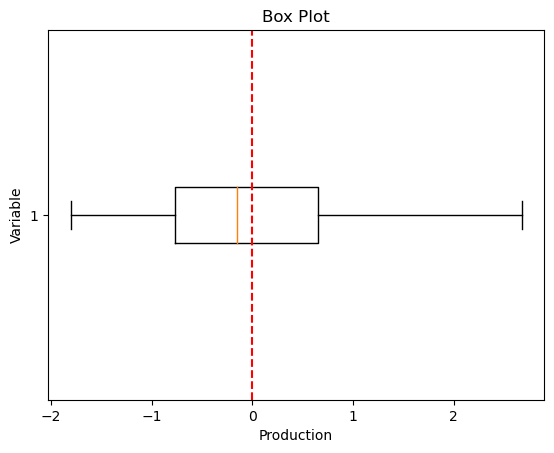

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df['production'].values.reshape(-1,1))
import matplotlib.pyplot as plt 
  
plt.boxplot(scaled_data, vert=False) 
mean = np.mean(scaled_data)
plt.axvline(mean, color='r', linestyle='--', label='Mean')

plt.ylabel('Variable') 
plt.xlabel('Production') 
plt.title('Box Plot') 
plt.show()

In [30]:
df['production'].isna().sum()

Datetime (UTC)                          0
Country                                 0
Zone Name                               0
Zone Id                                 0
Carbon Intensity gCO₂eq/kWh (direct)    0
Carbon Intensity gCO₂eq/kWh (LCA)       0
Low Carbon Percentage                   0
Renewable Percentage                    0
Data Source                             0
production                              0
dtype: int64

In [7]:
# 1. Handle missing values
df = df.dropna(subset=['production'])  # Drop rows with missing production values
df['production'] = df['production'].fillna(df['production'].mean())  # Impute missing values with mean

# 2. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()  # Drop duplicate rows

# 3. Convert data types
df['production'] = df['production'].astype(float)

# 4. Handle outliers
Q1 = df['production'].quantile(0.10)
Q3 = df['production'].quantile(0.90)
IQR = Q3 - Q1
outlier_mask = (df['production'] < (Q1 - 1.5 * IQR)) | (df['production'] > (Q3 + 1.5 * IQR))
df['outlier'] = outlier_mask 
#df = df.loc[~outlier_mask]  # Drop outliers



Number of duplicate rows: 0


In [32]:
Q1 = df['production'].quantile(0.10)
Q3 = df['production'].quantile(0.90)
IQR = Q3 - Q1
Q1

195.272

In [42]:
df['production'].isna().sum()

0

In [8]:
df.head()

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,production,outlier
0,2023-01-01 00:00:00,Germany,Germany,DE,176.56,227.06,81.86,75.03,entsoe.eu,176.56,False
1,2023-01-02 00:00:00,Germany,Germany,DE,308.94,364.16,69.63,63.69,entsoe.eu,308.94,False
2,2023-01-03 00:00:00,Germany,Germany,DE,434.45,499.26,57.58,50.93,entsoe.eu,434.45,False
3,2023-01-04 00:00:00,Germany,Germany,DE,192.94,236.29,80.57,76.62,entsoe.eu,192.94,False
4,2023-01-05 00:00:00,Germany,Germany,DE,343.69,400.74,65.92,59.97,entsoe.eu,343.69,False


### Data visualization

#### seaborn:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

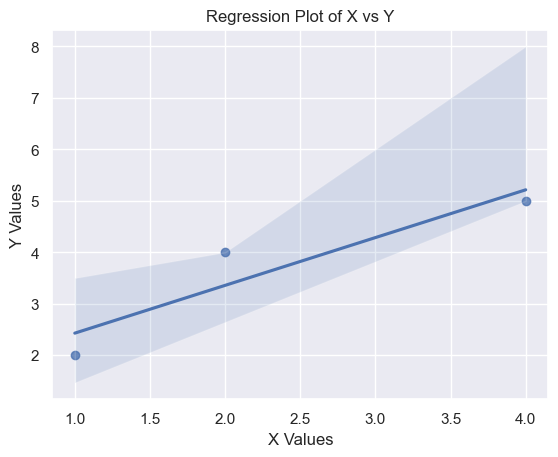

In [22]:
x = [1,2,4]
y = [2,4,5]
sns.regplot(x=x, y=y)
# Add titles and labels
plt.title('Regression Plot of X vs Y')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Show the plot
plt.show()

/Users/raphaelbarthes/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


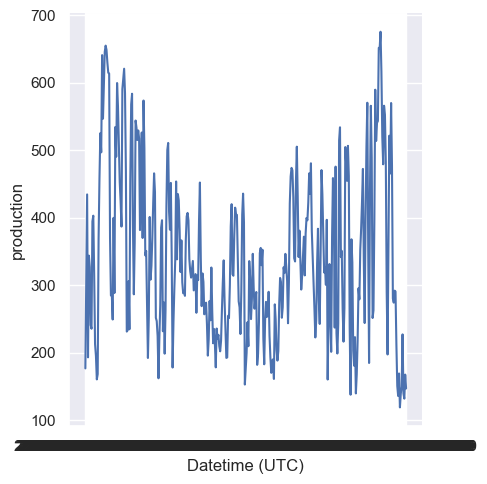

In [36]:
sns.relplot(data=df, x="Datetime (UTC)", y="production", kind="line")

### Pandas manipulation

In [37]:
import datetime
df['Datetime (UTC)']= pd.to_datetime(df['Datetime (UTC)'], format="%Y-%m-%d %H:%M:%S")
df['Day'] = df['Datetime (UTC)'].dt.day

In [45]:
df

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,production,Day
0,2023-01-01,Germany,Germany,DE,176.56,227.06,81.86,75.03,entsoe.eu,176.56,1
1,2023-01-02,Germany,Germany,DE,308.94,364.16,69.63,63.69,entsoe.eu,308.94,2
2,2023-01-03,Germany,Germany,DE,434.45,499.26,57.58,50.93,entsoe.eu,434.45,3
3,2023-01-04,Germany,Germany,DE,192.94,236.29,80.57,76.62,entsoe.eu,192.94,4
4,2023-01-05,Germany,Germany,DE,343.69,400.74,65.92,59.97,entsoe.eu,343.69,5
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,Germany,Germany,DE,226.95,286.56,73.60,67.86,entsoe.eu,226.95,27
361,2023-12-28,Germany,Germany,DE,139.51,184.43,84.66,83.43,entsoe.eu,139.51,28
362,2023-12-29,Germany,Germany,DE,131.68,175.50,85.51,84.39,entsoe.eu,131.68,29
363,2023-12-30,Germany,Germany,DE,167.32,218.14,81.87,78.20,entsoe.eu,167.32,30


In [49]:
pct = df[['production', 'Day', 'Carbon Intensity gCO₂eq/kWh (direct)']].pct_change()
pct 

,production,Day,Carbon Intensity gCO₂eq/kWh (direct)
0,NaN,NaN,NaN
1,0.749773,1.000000,0.749773
2,0.406260,0.500000,0.406260
3,-0.555898,0.333333,-0.555898
4,0.781331,0.250000,0.781331
...,...,...,...
360,0.519381,0.038462,0.519381
361,-0.385283,0.037037,-0.385283
362,-0.056125,0.035714,-0.056125
363,0.270656,0.034483,0.270656


In [50]:
df['prod_2'] = df['production'].pct_change()
df

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,production,Day,prod_2
0,2023-01-01,Germany,Germany,DE,176.56,227.06,81.86,75.03,entsoe.eu,176.56,1,NaN
1,2023-01-02,Germany,Germany,DE,308.94,364.16,69.63,63.69,entsoe.eu,308.94,2,0.749773
2,2023-01-03,Germany,Germany,DE,434.45,499.26,57.58,50.93,entsoe.eu,434.45,3,0.406260
3,2023-01-04,Germany,Germany,DE,192.94,236.29,80.57,76.62,entsoe.eu,192.94,4,-0.555898
4,2023-01-05,Germany,Germany,DE,343.69,400.74,65.92,59.97,entsoe.eu,343.69,5,0.781331
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,Germany,Germany,DE,226.95,286.56,73.60,67.86,entsoe.eu,226.95,27,0.519381
361,2023-12-28,Germany,Germany,DE,139.51,184.43,84.66,83.43,entsoe.eu,139.51,28,-0.385283
362,2023-12-29,Germany,Germany,DE,131.68,175.50,85.51,84.39,entsoe.eu,131.68,29,-0.056125
363,2023-12-30,Germany,Germany,DE,167.32,218.14,81.87,78.20,entsoe.eu,167.32,30,0.270656


/Users/raphaelbarthes/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


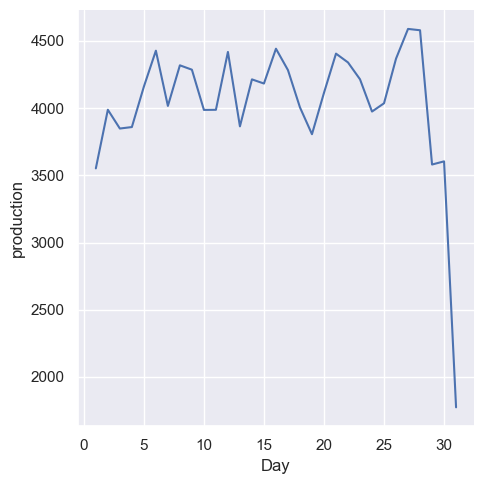

In [13]:
df_2 = df.groupby('Day')['production'].sum().reset_index()
sns.relplot(data=df_2, x="Day", y = "production", kind="line")

### Data standardization 

Standardization preserves the relationship between the data points and is less sensitive to outliers than Normalization 

In [ ]:
# Step 1: Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
data_imputed = imputer.fit_transform(df)